<a href="https://colab.research.google.com/github/luiscunhacsc/udemy-ia-pt/blob/main/parte1a_introducao/parte1a_exemplo02_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Rede Neural com Backpropagation
Este notebook contém um exemplo de uma rede neural simples, que é treinada usando o algoritmo backpropagation.
As funções de visualização são fornecidas em células separadas para facilitar a navegação e compreensão.


In [ ]:

# Redes Neurais Artificiais - Backpropagation

import numpy as np

# Funções de ativação e suas derivadas
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Inicializações
inputs = np.array([0.5, 0.9, -0.3])
expected_output = np.array([0.9, 0.3])
weights_hidden = np.array([[1.0, -2.0, 2.0], [2.0, 1.0, -4.0], [1.0, -1.0, 0.0]])
weights_output = np.array([[-3.0, 1.0, -3.0], [0.0, 1.0, 2.0]])
learning_rate = 0.1
loss_values = []

# Número ajustável de épocas
num_epochs = 1000  # Altere este número conforme desejado

# Treinamento da rede neural
for epoch in range(num_epochs):
    # Forward propagation
    hidden_layer_activation = np.dot(weights_hidden, inputs)
    hidden_layer_output = sigmoid(hidden_layer_activation)
    final_output = sigmoid(np.dot(weights_output, hidden_layer_output))

    # Backpropagation
    error = expected_output - final_output
    d_final_output = error * sigmoid_derivative(final_output)
    error_hidden_layer = d_final_output.dot(weights_output)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)
    weights_output += learning_rate * np.outer(d_final_output, hidden_layer_output)
    weights_hidden += learning_rate * np.outer(d_hidden_layer, inputs)

    # Cálculo do erro
    loss = np.mean(np.square(error))
    loss_values.append(loss)

    if epoch % (num_epochs//10) == 0:
        print(f'Epoch {epoch}, Loss: {loss}')

# Imprime os pesos finais após o treino:
print('\\nPesos finais da camada oculta:')
print(weights_hidden)
print('Pesos finais da camada de saída:')
print(weights_output)

print('\\Output final após o treino:')
print(final_output)
print('Output esperado:')
print(expected_output)
print('Erro final:')
print(error)

Epoch 0, Loss: 0.306532921277229
Epoch 100, Loss: 0.07976273745407689
Epoch 200, Loss: 0.022893551318966317
Epoch 300, Loss: 0.008087388399890877
Epoch 400, Loss: 0.003591469033946814
Epoch 500, Loss: 0.001903392475856794
Epoch 600, Loss: 0.0011481058318983106
Epoch 700, Loss: 0.0007586803726333501
Epoch 800, Loss: 0.0005335345464266322
Epoch 900, Loss: 0.00039120953760583783
\nPesos finais da camada oculta:
[[ 0.78535854 -2.38635463  2.12878488]
 [ 2.05894493  1.10610087 -4.03536696]
 [ 0.30605228 -2.2491059   0.41636863]]
Pesos finais da camada de saída:
[[-2.82735452  2.6021329  -2.62164075]
 [-0.21514193 -1.04321128  1.55538615]]
\Output final após o treino:
[0.87579945 0.3024596 ]
Output esperado:
[0.9 0.3]
Erro final:
[ 0.02420055 -0.0024596 ]


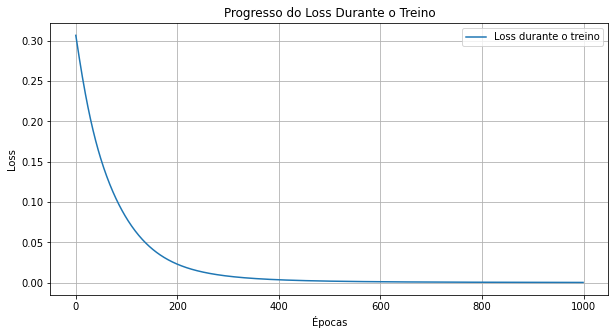

In [ ]:
import matplotlib.pyplot as plt

# Gráfico do loss ao longo das épocas
plt.figure(figsize=(10, 5))
plt.plot(loss_values, label='Loss durante o treino')
plt.title('Progresso do Loss Durante o Treino')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()
